In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/All New Signals.csv")
# df
# print(df['weather'].value_counts())
# df['Ridership'].mean()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.dropna()


# One hot encode the categorical values

In [ ]:
df2 = pd.get_dummies(df, prefix=['weather'], columns=['weather'])
df2
df2.columns

,Ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,total_comedy,...,weather_Light rain,weather_Moderate rain,weather_Overcast clouds,weather_Partly clear and wet snow at times,weather_Partly cloudy,weather_Rain and snow,weather_Shower sleet,weather_Snow,weather_Thunderstorm with heavy rain,weather_Thunderstorm with rain
date,,,,,,,,,,,,,,,,,,,,,
2023-02-17,3253165.0,59.0,59.0,1,1,1,1,0,1,26,...,0,0,0,0,0,0,0,0,0,0
2023-02-18,2271106.0,41.0,32.0,1,1,1,1,0,1,42,...,0,0,0,0,0,0,0,0,0,0
2023-02-19,1824136.0,48.0,39.0,1,1,1,1,0,1,25,...,0,0,1,0,0,0,0,0,0,0
2023-02-20,2238528.0,55.0,48.0,0,0,1,1,1,1,17,...,0,0,0,0,0,0,0,0,0,0
2023-02-21,3325483.0,45.0,50.0,0,0,1,0,0,1,25,...,0,0,1,0,0,0,0,0,0,0
2023-02-22,3454275.0,43.0,41.0,0,0,1,0,0,1,24,...,0,0,0,0,0,0,0,0,0,0
2023-02-23,3498242.0,43.0,41.0,0,1,1,0,0,0,31,...,0,0,1,0,0,0,0,0,0,0
2023-02-24,3244250.0,39.0,43.0,1,1,1,1,0,1,42,...,0,0,0,0,0,0,0,0,0,0
2023-02-25,2041901.0,28.0,27.0,1,0,1,1,0,1,46,...,0,0,0,0,0,0,0,1,0,0


# df4 past 14 days worth of data

In [ ]:
df3['ridership_shift_1_days'] = df3['Ridership'].shift(1)
df3['ridership_shift_2_days'] = df3['Ridership'].shift(2)
df3['ridership_shift_3_days'] = df3['Ridership'].shift(3)
df3['ridership_shift_4_days'] = df3['Ridership'].shift(4)
df3['ridership_shift_5_days'] = df3['Ridership'].shift(5)
df3['ridership_shift_6_days'] = df3['Ridership'].shift(6)
df3['ridership_shift_7_days'] = df3['Ridership'].shift(7)
df3['ridership_shift_8_days'] = df3['Ridership'].shift(8)
df3['ridership_shift_9_days'] = df3['Ridership'].shift(9)
df3['ridership_shift_10_days'] = df3['Ridership'].shift(10)
df3['ridership_shift_11_days'] = df3['Ridership'].shift(11)
df3['ridership_shift_12_days'] = df3['Ridership'].shift(12)
df3['ridership_shift_13_days'] = df3['Ridership'].shift(13)
df3['ridership_shift_14_days'] = df3['Ridership'].shift(14)

# Test Data

In [ ]:
df3 = df2.copy()
# Setting up past and future data
mock_modeling_data_df = df3.loc['2020-03-01':'2023-02-17']
mock_forecast_verification_df = df3.loc['2023-02-17':'2023-03-02']
mock_forecast_verification_df

In [ ]:
# Encode the label using LabelEncoder
X = mock_modeling_data_df.loc[:, 'day temp':'weather_Thunderstorm with rain']
# X = mock_modeling_data_df.loc[:, 'Ridership':'weather_Thunderstorm with rain']
y = mock_modeling_data_df.loc[:, 'Ridership']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [ ]:
# Scaling data with StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()

# Fitting standard scaler on X_train and y_train using transform
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Fitting standard scaler on X_test and y_test using transform
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:

gbr = GradientBoostingRegressor(n_estimators=5000, max_depth=7, learning_rate=.001, validation_fraction = 0.3, alpha = 0.5)
# n_estimators = number of trees we want to fit sequentially
# max_depth = internal node splits
# learning_rate = multiply your predictions by whatever you set, to shrink down adjustments you're making w each model

modelfit = gbr.fit(X_train,y_train)
print(modelfit)
print(modelfit.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.5, learning_rate=0.001, max_depth=7,
                          n_estimators=5000, validation_fraction=0.3)
0.9943023833275468


In [ ]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
print("Model Accuracy: %.3f" % modelfit.score(X_test, y_test))

# Create the mean squared error

mse = mean_squared_error(y_test, modelfit.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.994
The mean squared error (MSE) on test set: 6145746948.4599


In [ ]:
df['Ridership'].mean()

2114897.661187215

In [ ]:
y_pred = modelfit.predict(X_test)
y_pred

array([ 373822.33505285, 2290069.37158741, 1563683.84177532,
       2888342.60901759,  555814.80216054, 3308876.65827319,
       3244136.87372411, 2984141.96279724,  419389.39088853,
       3127530.62506252, 3024593.26595986, 2707760.11672718,
        957921.05221455, 1794345.65269214, 3096183.25838377,
       2990216.69942421, 2796460.68446012,  935648.55265753,
       1435176.66965788, 1788469.92593881,  997237.19359871,
       2287706.23625661, 1640397.37560846, 1728319.85675635,
       1463545.62351351,  772114.87459828, 3155806.43930169,
       3457890.6239003 , 2053052.8321973 , 1098823.74124767,
       2353169.30205834, 2458308.44810749, 3229531.94838406,
        993483.93201634, 2526782.43521588, 1407955.26981222,
       1827820.73146663, 1043247.44110082, 3195778.94774051,
       1737861.63928039, 3070846.39440968, 3264132.71864595,
       1808361.60232506, 1727563.32499392, 2136946.60350698,
       2637379.66070048, 1783928.13834208, 1920298.0563882 ,
        643766.15314805,

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 63937.60515809569
Mean Squared Error: 6145746948.4599
Root Mean Squared Error: 78394.81455083557
R Squared Score is: 0.9943023833275468


# Saving model to run on new data

In [ ]:
# #Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
# import pickle

# # Open a file and use dump()
# with open('X_train.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(X_train, file)

# #Save data
# import pickle

# # Open a file and use dump()
# with open('X_test.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(X_test, file)

# #Save data
# import pickle

# # Open a file and use dump()
# with open('y_train.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(y_train, file)


# # Open a file and use dump()
# with open('y_test.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(y_test, file)

# Use model to predict on live data

In [ ]:
mock_forecast_verification_df

,Ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,total_comedy,...,weather_Light rain,weather_Moderate rain,weather_Overcast clouds,weather_Partly clear and wet snow at times,weather_Partly cloudy,weather_Rain and snow,weather_Shower sleet,weather_Snow,weather_Thunderstorm with heavy rain,weather_Thunderstorm with rain
date,,,,,,,,,,,,,,,,,,,,,
2023-02-17,3253165.0,59.0,59.0,1,1,1,1,0,1,26,...,0,0,0,0,0,0,0,0,0,0
2023-02-18,2271106.0,41.0,32.0,1,1,1,1,0,1,42,...,0,0,0,0,0,0,0,0,0,0
2023-02-19,1824136.0,48.0,39.0,1,1,1,1,0,1,25,...,0,0,1,0,0,0,0,0,0,0
2023-02-20,2238528.0,55.0,48.0,0,0,1,1,1,1,17,...,0,0,0,0,0,0,0,0,0,0
2023-02-21,3325483.0,45.0,50.0,0,0,1,0,0,1,25,...,0,0,1,0,0,0,0,0,0,0
2023-02-22,3454275.0,43.0,41.0,0,0,1,0,0,1,24,...,0,0,0,0,0,0,0,0,0,0
2023-02-23,3498242.0,43.0,41.0,0,1,1,0,0,0,31,...,0,0,1,0,0,0,0,0,0,0
2023-02-24,3244250.0,39.0,43.0,1,1,1,1,0,1,42,...,0,0,0,0,0,0,0,0,0,0
2023-02-25,2041901.0,28.0,27.0,1,0,1,1,0,1,46,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_pred = modelfit.predict(mock_forecast_verification_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Target predictions

target = mock_forecast_verification_df['Ridership']

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(target, new_pred))
print('Mean Squared Error:', metrics.mean_squared_error(target, new_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target, new_pred)))
print('R Squared Score is:', r2_score(target, new_pred))

Mean Absolute Error: 2105964.8152586934
Mean Squared Error: 4994981044805.847
Root Mean Squared Error: 2234945.4232275668
R Squared Score is: -8.470986620644993


In [ ]:
t = pd.DataFrame(target)
t['pred'] = new_pred
t

,Ridership,pred
date,,
2023-02-17,3253165.0,5.073223e+06
2023-02-18,2271106.0,5.074253e+06
2023-02-19,1824136.0,5.073448e+06
2023-02-20,2238528.0,4.992767e+06
2023-02-21,3325483.0,4.999092e+06
2023-02-22,3454275.0,5.005259e+06
2023-02-23,3498242.0,4.991372e+06
2023-02-24,3244250.0,5.074253e+06
2023-02-25,2041901.0,5.096072e+06


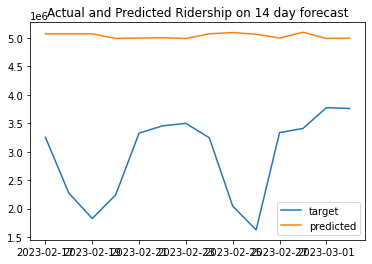

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(target, label='target')
plt.plot(t['pred'], label='predicted')
plt.legend()
plt.title("Actual and Predicted Ridership on 14 day forecast")
plt.show()

In [ ]:
# Gradient Boost not very accurate in predictions

# Without ridership as signal

In [ ]:
no_rid = mock_forecast_verification_df.loc[:, 'day temp':'weather_Thunderstorm with rain']

In [ ]:
# Because previous model is trained including Ridership, the model won't work on data without ridership

new_pred1 = modelfit.predict(no_rid)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


ValueError: ignored

# New data train test

In [ ]:
# Encode the label using LabelEncoder
X1 = mock_forecast_verification_df.loc[:, 'Ridership':'weather_Thunderstorm with rain']
y1 = mock_forecast_verification_df.loc[:, 'Ridership']


# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, test_size = 0.2)

In [ ]:
# Scaling data with StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()

# Fitting standard scaler on X_train and y_train using transform
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)

# Fitting standard scaler on X_test and y_test using transform
scaler.fit(X1_test)
X1_test = scaler.transform(X1_test)

In [ ]:
new_X = mock_forecast_verification_df.loc[:, 'Ridership':'weather_Thunderstorm with rain']

In [ ]:

gbr = GradientBoostingRegressor(n_estimators=5000, max_depth=7, learning_rate=.001, validation_fraction = 0.3, alpha = 0.5)

modelfit1 = gbr.fit(X1_train,y1_train)
print(modelfit1)
print(modelfit1.score(X1_test, y1_test))

In [ ]:
print("Model Accuracy: %.3f" % modelfit1.score(X1_test, y1_test))
#
# Create the mean squared error
#
mse11 = mean_squared_error(y1_test, modelfit1.predict(X1_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse11))

In [ ]:
y_pred1 = modelfit1.predict(X1_test)
y_pred1

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)))
print('R Squared Score is:', r2_score(y1_test, y_pred1))

# RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=100, max_depth = 10) #mse default criterion
# max_features number taken from square rooting total number of features

rf = forest.fit(X_train,y_train)
rf.score(X_test, y_test)

In [ ]:
print(rf.score(X_train,y_train))

In [ ]:
print(rf.feature_importances_) 

In [ ]:
dtf = rf.feature_importances_
dt = pd.DataFrame(index = X.columns)
dt['Features Importance'] = dtf
dt

In [ ]:
print("Model Accuracy: %.3f" % rf.score(X_test, y_test))
#
# Create the mean squared error
#
mserf = mean_squared_error(y_test, rf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mserf))

# RF on Live Data

In [ ]:
new_predrf = rf.predict(mock_forecast_verification_df)

In [ ]:
# Target predictions

targetrf = mock_forecast_verification_df['Ridership']

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(targetrf, new_predrf))
print('Mean Squared Error:', metrics.mean_squared_error(targetrf, new_predrf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(targetrf, new_predrf)))
print('R Squared Score is:', r2_score(targetrf, new_predrf))

In [ ]:
trf = pd.DataFrame(targetrf)
trf['pred'] = new_predrf
trf

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(targetrf, label='target')
plt.plot(trf['pred'], label='predicted')
plt.legend()
plt.title("Actual and Predicted Ridership on 14 day forecast")
plt.show()

In [ ]:
forest = RandomForestRegressor(n_estimators=200, max_depth = 7, min_samples_leaf = 1) #mse default criterion
# max_features number taken from square rooting total number of features

rf1 = forest.fit(X1_train,y1_train)
rf1.score(X1_test, y1_test)

In [ ]:
print("Model Accuracy: %.3f" % rf1.score(X1_test, y1_test))
#
# Create the mean squared error
#
mserf1 = mean_squared_error(y1_test, rf1.predict(X1_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mserf1))

In [ ]:
y_pred2 = rf1.predict(X1_test)
y_pred2

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred2)))
print('R Squared Score is:', r2_score(y1_test, y_pred2))

# Combining all mse scores together

In [ ]:
models = ['Gradient Boost', 'Random Forest']

In [ ]:
scores = pd.DataFrame(index= models)

In [ ]:
scores['Past Data'] = mse, mserf

In [ ]:
scores

In [ ]:
scores['Forecast Data'] = mse11, mserf1

In [ ]:
scores